2d-reals/rq_old\aniso=[1.0,1.0,1.0]-s=0.300-l=0.500-a=0.500-sample-0.bin


ValueError: cannot reshape array of size 65536 into shape (1024,1024)

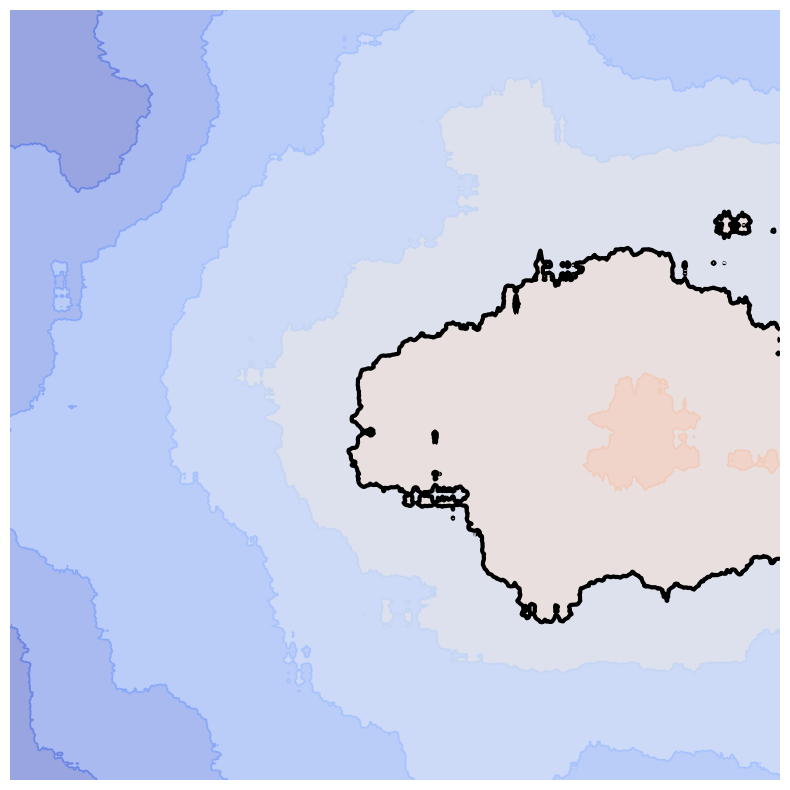

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import glob
import os
import scipy.interpolate as interp

nps = 256

with plt.style.context("seaborn-v0_8-dark"):
    params = {'text.usetex' : True,
            'font.size' : 7,
            'font.family' : 'Linux Libertine'}
    plt.rcParams.update(params)

    for f in glob.glob("2d-reals/rq_old/*sample-0.bin"):
        
        try:
            nps = int(f.split("-")[-2])
        except:
            nps = 1024
        samples = np.reshape(np.fromfile(f, dtype=np.cdouble), (nps,nps))
        samples = np.real(samples)

        xs_g = np.linspace(-2, 2, nps)

        grid = interp.RegularGridInterpolator((xs_g,xs_g), samples)

        xs_i = np.linspace(-2, 2, 512)

        xx, yy = np.meshgrid(xs_i, xs_i)

        samples_interp = grid((xx,yy))
        fig, ax = plt.subplots(figsize=(10,10))

        utils.plot_realization(samples_interp, ax, xx, yy)
        ax.set_xticks([])
        ax.set_yticks([])

        print(f)

        fig.savefig(os.path.join("figures/reals", os.path.basename(f)[:-4] + ".pdf"), dpi=300, bbox_inches='tight',pad_inches=0)



